In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
order=pd.read_csv("orders.csv")
order.head()
order.info()

# 1. identify the time at which we are getting high orders and the time at which we are getting the lowest orders


In [ ]:
import datetime as dt
order["time"]=pd.to_datetime(order["time"])
order["hour"]=order["time"].dt.strftime("%H")
order

      order_details_id
hour                  
09                   4
10                  17
11                2672
12                6543
13                6203
14                3521
15                3170
16                4185
17                5143
18                5359
19                4350
20                3487
21                2528
22                1370
23                  68
 
1.Highest order are placed during 12 o'clock
2.Lowest order are placed during 09 o'clock


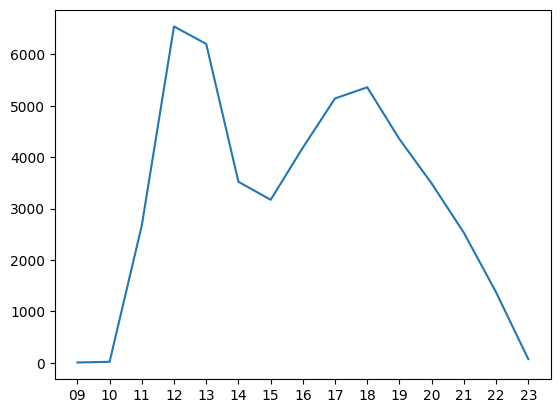

In [86]:
od=pd.read_csv("order_details.csv")
od=pd.merge(left=order,right=od,on="order_id",how="left")
gb=od.groupby("hour").agg({"order_details_id":"count"})
print(gb)
max=gb["order_details_id"].idxmax()
min=gb["order_details_id"].idxmin()
print(" ")
print("1.Highest order are placed during",max,"o'clock")
print("2.Lowest order are placed during",min,"o'clock")
plt.plot(gb.index,gb["order_details_id"])
plt.show()

# 2. identify which day of the week we are getting the most orders.

           order_details_id
day                        
Friday                 8106
Monday                 6369
Saturday               7355
Sunday                 5917
Thursday               7323
Tuesday                6753
Wednesday              6797
 
2. Most Orders are placed on Friday
2. Min orders are placed on Sunday


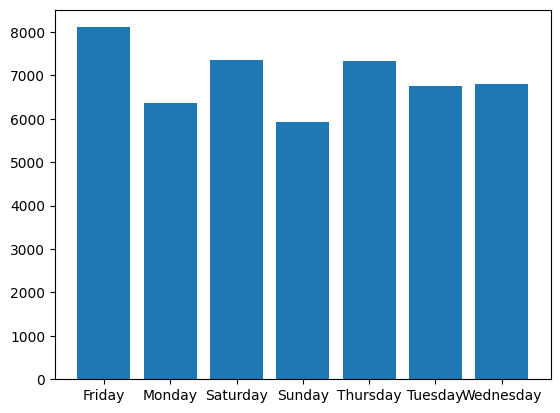

In [85]:
od["date"]=pd.to_datetime(od["date"])
od["day"]=od["date"].dt.strftime("%A")
gb1=od.groupby("day").agg({"order_details_id":"count"})
print(gb1)
plt.bar(gb1.index,gb1["order_details_id"])
most_orders=gb1["order_details_id"].idxmax()
min_orders=gb1["order_details_id"].idxmin()
print(" ")
print("2. Most Orders are placed on",most_orders)
print("2. Min orders are placed on",min_orders)
plt.show()

# 3. total sales

In [92]:
pizza=pd.read_csv("pizzas.csv")
df=pd.merge(left=pizza,right=od,on="pizza_id",how="right")
df["amount"]=df["price"]*df["quantity"]
print("3.Total Sales is",df["amount"].sum())

3.Total Sales is 817860.05


# 4. identify which pizza is ordered the most

In [169]:
pt=pd.read_csv("pizza_types.csv",encoding="unicode_escape")
pt=pt.rename(columns={"pizza_type_id":"sr.no"})
pt=pt.rename(columns={"name":"pizza_type_id"})
df1=pd.merge(left=df,right=pt,on="pizza_type_id",how="left")
gb1=df1.groupby("category").agg({"order_details_id":"count"})
print("4.The most ordered pizza is:",gb1["order_details_id"].idxmax())
print(gb1)

4.The most ordered pizza is: The Classic Deluxe Pizza
                                            order_details_id
category                                                    
The Barbecue Chicken Pizza                              2372
The Big Meat Pizza                                      1811
The Brie Carre Pizza                                     480
The Calabrese Pizza                                      927
The California Chicken Pizza                            2302
The Chicken Alfredo Pizza                                980
The Chicken Pesto Pizza                                  961
The Classic Deluxe Pizza                                2416
The Five Cheese Pizza                                   1359
The Four Cheese Pizza                                   1850
The Greek Pizza                                         1406
The Green Garden Pizza                                   987
The Hawaiian Pizza                                      2370
The Italian Capocollo Pizza    

# 5. Identify which pizza is generating more sales

In [179]:
gb2=df1.groupby("category").agg({"Amount":"sum"})
more_sales=gb2["Amount"].idxmax()
print("5.",more_sales,"is generating more sales")
gb2.sort_values(by="Amount",ascending=False)

5. The Thai Chicken Pizza is generating more sales


,Amount
category,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25
The Southwest Chicken Pizza,34705.75
The Italian Supreme Pizza,33476.75
The Hawaiian Pizza,32273.25
The Four Cheese Pizza,32265.70


# 6. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)

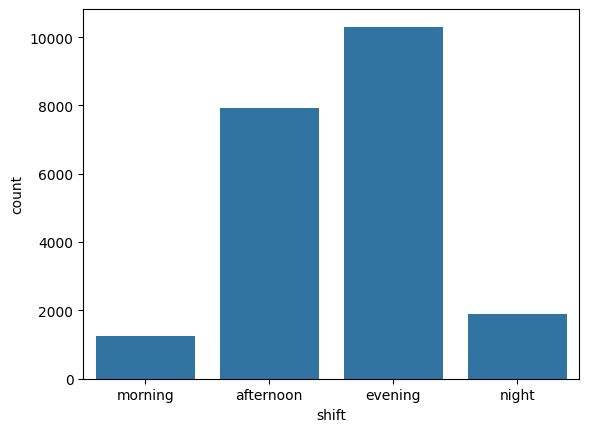

In [199]:
order["hour"]=order["hour"].astype("int64")
order.loc[((order["hour"]>9)&(order["hour"]<12)),"shift"]="morning"
order.loc[((order["hour"]>=12)&(order["hour"]<16)),"shift"]="afternoon"
order.loc[((order["hour"]>=16)&(order["hour"]<21)),"shift"]="evening"
order.loc[((order["hour"]>=21)&(order["hour"]<24)),"shift"]="night"
sns.countplot(x="shift",data=order)
plt.show()

# 7.identify which pizza category is hotselling

Classic Category Pizza is hotselling


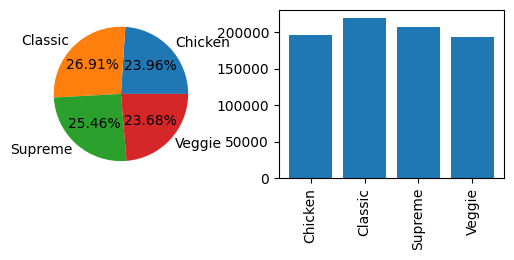

In [207]:
gb2=df1.groupby("ingredients").agg({"Amount":"sum"})
hotselling=gb2["Amount"].idxmax()
print(hotselling,"Category Pizza is hotselling")
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.pie(x=gb2["Amount"],labels=gb2.index,autopct="%1.2f%%")
plt.subplot(2,2,2)
plt.bar(gb2.index,gb2["Amount"])
plt.xticks(rotation=90)
plt.show()